In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key
import time
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f982584af00114b44817f7b60fb7ac8e


In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | mogadishu
Processing Record 8 of Set 1 | mpraeso
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | quthing
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | padang
Processing Record 16 of Set 1 | harfleur
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | igarka
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22

Processing Record 36 of Set 4 | sarakhs
Processing Record 37 of Set 4 | homestead
Processing Record 38 of Set 4 | colares
Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | abancay
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | bocaiuva
Processing Record 47 of Set 4 | pouembout
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | dalbandin
Processing Record 50 of Set 4 | phan thiet
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | kokstad
Processing Record 3 of Set 5 | warrington
Processing Record 4 of Set 5 | ozgon
City not found. Skipping...
Processing Record 5 of Set 5 | victor harbor
Processing Record 6 of Set 5 | sibolga
Processing Record 7 of Set 5 | verkhniy lomov
Processing Record 8 of Set 5 | cur

Processing Record 27 of Set 8 | muros
Processing Record 28 of Set 8 | bambous virieux
Processing Record 29 of Set 8 | san jose
Processing Record 30 of Set 8 | greenwood
Processing Record 31 of Set 8 | bay roberts
Processing Record 32 of Set 8 | sainte-anne-des-monts
Processing Record 33 of Set 8 | portales
Processing Record 34 of Set 8 | we
City not found. Skipping...
Processing Record 35 of Set 8 | hervey bay
Processing Record 36 of Set 8 | abejorral
Processing Record 37 of Set 8 | darnah
Processing Record 38 of Set 8 | suifenhe
Processing Record 39 of Set 8 | mollendo
Processing Record 40 of Set 8 | clyde river
Processing Record 41 of Set 8 | lesozavodsk
Processing Record 42 of Set 8 | foggia
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | sakakah
Processing Record 45 of Set 8 | pemberton
Processing Record 46 of Set 8 | sabha
Processing Record 47 of Set 8 | hobyo
Processing Record 48 of Set 8 | plaeng yao
Processing Record 49 of Set 8 | raudeberg
Processing R

Processing Record 17 of Set 12 | ziarat
Processing Record 18 of Set 12 | namatanai
Processing Record 19 of Set 12 | trincomalee
Processing Record 20 of Set 12 | sioux lookout
Processing Record 21 of Set 12 | tubmanburg
Processing Record 22 of Set 12 | haimen
Processing Record 23 of Set 12 | pitea
Processing Record 24 of Set 12 | evensk
Processing Record 25 of Set 12 | pandan
Processing Record 26 of Set 12 | touros
Processing Record 27 of Set 12 | matay
Processing Record 28 of Set 12 | shelburne
Processing Record 29 of Set 12 | qarqin
Processing Record 30 of Set 12 | acapulco
Processing Record 31 of Set 12 | kragero
Processing Record 32 of Set 12 | boca do acre
Processing Record 33 of Set 12 | panaba
Processing Record 34 of Set 12 | pamekasan
Processing Record 35 of Set 12 | salalah
Processing Record 36 of Set 12 | kang
Processing Record 37 of Set 12 | beyneu
Processing Record 38 of Set 12 | kahului
Processing Record 39 of Set 12 | abu kamal
Processing Record 40 of Set 12 | seoul
Proces

In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,41.00,65,75,32.21,AR,2020-11-09 03:40:26
1,Hambantota,6.12,81.12,82.40,88,20,3.36,LK,2020-11-09 03:40:55
2,Kapaa,22.08,-159.32,80.60,69,75,13.87,US,2020-11-09 03:40:30
3,Leningradskiy,69.38,178.42,19.83,94,100,6.58,RU,2020-11-09 03:46:26
4,Bengkulu,-3.80,102.27,81.81,76,98,5.26,ID,2020-11-09 03:44:11
5,Mogadishu,2.04,45.34,79.29,81,77,7.67,SO,2020-11-09 03:41:52
6,Mpraeso,6.59,-0.73,68.92,100,73,2.82,GH,2020-11-09 03:46:26
7,Hobart,-42.88,147.33,80.01,33,0,5.82,AU,2020-11-09 03:35:24
8,Jamestown,42.10,-79.24,57.20,50,1,3.96,US,2020-11-09 03:40:31
9,Dikson,73.51,80.55,-1.41,91,95,14.65,RU,2020-11-09 03:40:39


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [8]:
ordered_city_data_df = city_data_df[new_column_order]

In [9]:
ordered_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-11-09 03:40:26,-54.80,-68.30,41.00,65,75,32.21
1,Hambantota,LK,2020-11-09 03:40:55,6.12,81.12,82.40,88,20,3.36
2,Kapaa,US,2020-11-09 03:40:30,22.08,-159.32,80.60,69,75,13.87
3,Leningradskiy,RU,2020-11-09 03:46:26,69.38,178.42,19.83,94,100,6.58
4,Bengkulu,ID,2020-11-09 03:44:11,-3.80,102.27,81.81,76,98,5.26
5,Mogadishu,SO,2020-11-09 03:41:52,2.04,45.34,79.29,81,77,7.67
6,Mpraeso,GH,2020-11-09 03:46:26,6.59,-0.73,68.92,100,73,2.82
7,Hobart,AU,2020-11-09 03:35:24,-42.88,147.33,80.01,33,0,5.82
8,Jamestown,US,2020-11-09 03:40:31,42.10,-79.24,57.20,50,1,3.96
9,Dikson,RU,2020-11-09 03:40:39,73.51,80.55,-1.41,91,95,14.65


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
type(lats)

pandas.core.series.Series

In [13]:
today = time.time()
today

1604874183.0149386

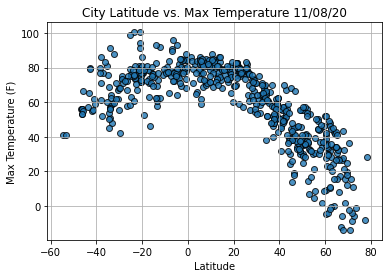

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

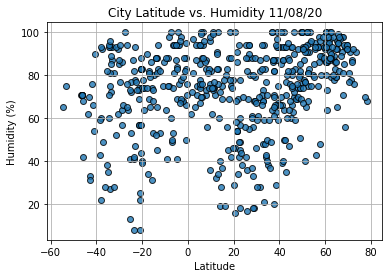

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

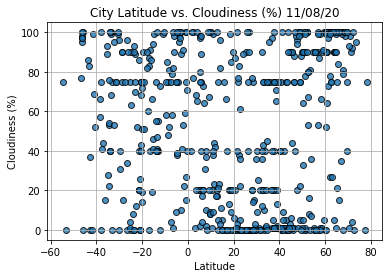

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

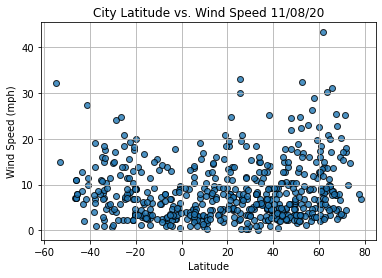

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hambantota,6.12,81.12,82.40,88,20,3.36,LK,2020-11-09 03:40:55
2,Kapaa,22.08,-159.32,80.60,69,75,13.87,US,2020-11-09 03:40:30
3,Leningradskiy,69.38,178.42,19.83,94,100,6.58,RU,2020-11-09 03:46:26
5,Mogadishu,2.04,45.34,79.29,81,77,7.67,SO,2020-11-09 03:41:52
6,Mpraeso,6.59,-0.73,68.92,100,73,2.82,GH,2020-11-09 03:46:26
...,...,...,...,...,...,...,...,...,...
547,Seoul,37.57,126.98,50.00,20,1,9.01,KR,2020-11-09 03:42:57
549,Yorosso,12.35,-4.78,71.58,32,17,2.44,ML,2020-11-09 03:47:46
551,Sunrise Manor,36.21,-115.07,48.20,49,20,12.75,US,2020-11-09 03:47:46
552,Wageningen,51.97,5.67,52.00,100,90,3.36,NL,2020-11-09 03:47:46


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

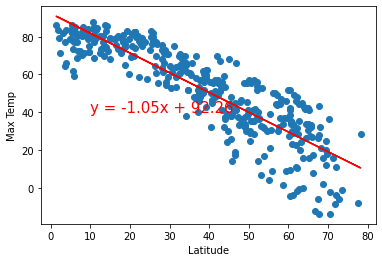

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

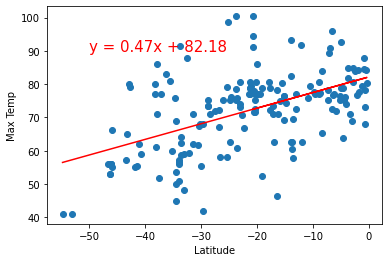

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [23]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

In [24]:
print ((slope, intercept, r_value, p_value, std_err))

(0.4692014360780121, 82.1805269029999, 0.5257631524711426, 1.302910117670832e-13, 0.05822184113430228)


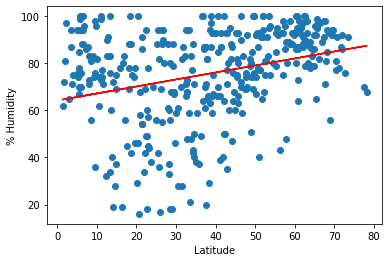

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

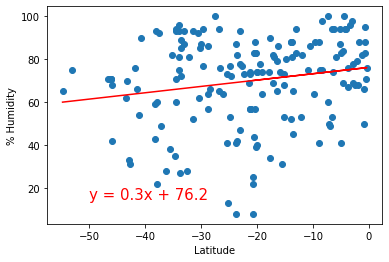

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

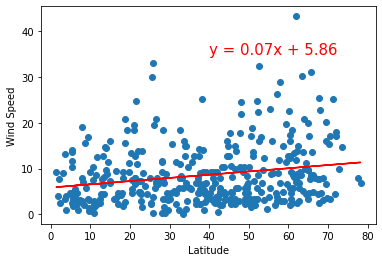

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

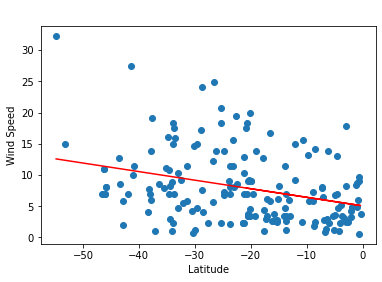

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))